In [ ]:
!pip install tensorflow_hub
!pip install tensorflow_datasets

In [1]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds

In [12]:
import tensorflow_hub as hub
import tensorflow_datasets as tfds

In [2]:
from data_util import preprocess_image

In [3]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file(origin=dataset_url, fname='flower_photos', untar=True)
data_dir = pathlib.Path(data_dir)

In [4]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [5]:
data_dir

PosixPath('/root/.keras/datasets/flower_photos')

In [6]:
batch_size = 32
img_height = 224
img_width = 224

In [7]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory( data_dir, validation_split=0.2, subset="training", seed=123, 
                                                               image_size=(img_height, img_width),batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [8]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir, validation_split=0.2, subset="validation", seed=123,
  image_size=(img_height, img_width), batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [9]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


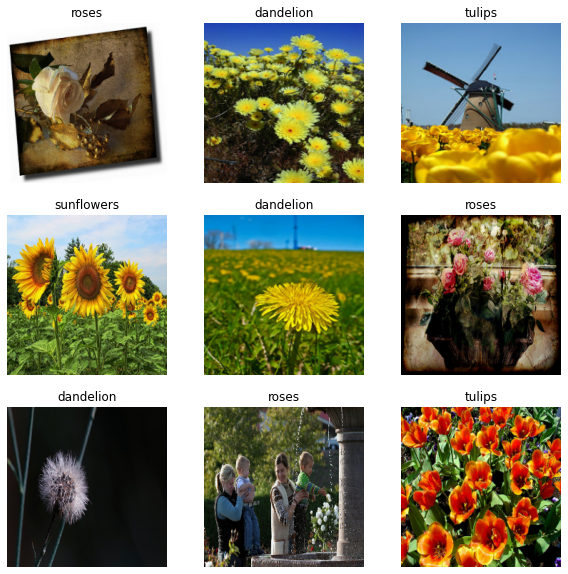

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [27]:
m = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4",
                   trainable=True),  # Can be True, see below.
    tf.keras.layers.Dense(len(class_names), activation='softmax')
])
m.build([None, 224, 224, 3])  # Batch input shape.

In [28]:
m.compile(optimizer='adam', loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [29]:
m.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_4 (KerasLayer)   (None, 2048)              23564800  
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 10245     
Total params: 23,575,045
Trainable params: 23,529,605
Non-trainable params: 45,440
_________________________________________________________________


In [30]:
m.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20,
    verbose=1,
    batch_size=32)

Epoch 1/20
92/92 [==============================] - 44s 482ms/step - loss: 1.6822 - accuracy: 0.5204 - val_loss: 1.9797 - val_accuracy: 0.2398
Epoch 2/20
92/92 [==============================] - 42s 455ms/step - loss: 1.7226 - accuracy: 0.4949 - val_loss: 1.9683 - val_accuracy: 0.2452
Epoch 3/20
92/92 [==============================] - 42s 455ms/step - loss: 1.6723 - accuracy: 0.5262 - val_loss: 2.0082 - val_accuracy: 0.1853
Epoch 4/20
92/92 [==============================] - 42s 453ms/step - loss: 1.6496 - accuracy: 0.5341 - val_loss: 1.7650 - val_accuracy: 0.3965
Epoch 5/20
92/92 [==============================] - 42s 456ms/step - loss: 1.5971 - accuracy: 0.5688 - val_loss: 1.8302 - val_accuracy: 0.3392
Epoch 6/20
92/92 [==============================] - 42s 461ms/step - loss: 1.5765 - accuracy: 0.5766 - val_loss: 1.6085 - val_accuracy: 0.5341
Epoch 7/20
92/92 [==============================] - 42s 460ms/step - loss: 1.5452 - accuracy: 0.5964 - val_loss: 1.6936 - val_accuracy: 0.4469